## 第60课 使用word2vec+tensorflow自然语言处理NLP

### Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

### Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


Embeddings (in general, not only in Keras) are methods for learning vector representations of categorical data. They are most commonly used for working with textual data. Word2vec and GloVe are two popular frameworks for learning word embeddings. What embeddings do, is they simply learn to map the one-hot encoded categorical variables to vectors of floating point numbers of smaller dimensionality then the input vectors. For example, one-hot vector representing a word from vocabulary of size 50 000 is mapped to real-valued vector of size 100. Then, the embeddings vector is used for whatever you want to use it as features.

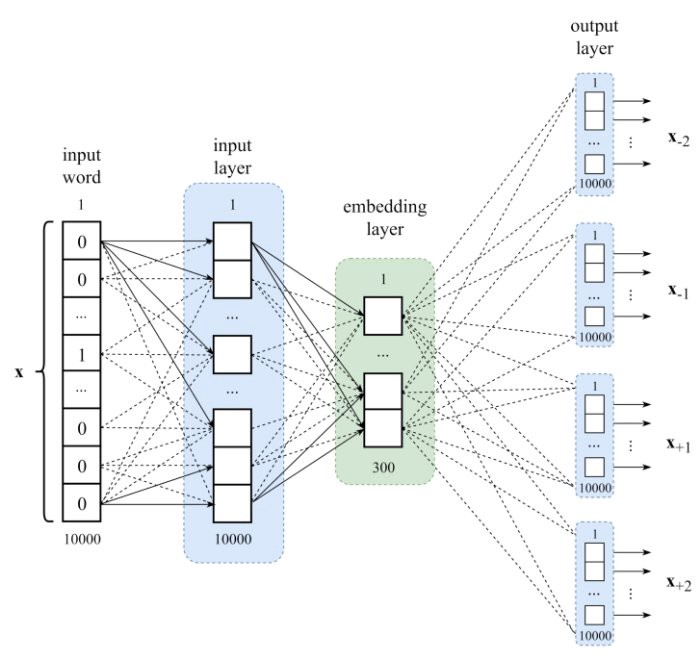

In [163]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson58-11.jpeg')

Word embedding via word2vec can make natural language computer-readable, then further implementation of mathematical operations on words can be used to detect their similarities. A well-trained set of word vectors will place similar words close to each other in that space.

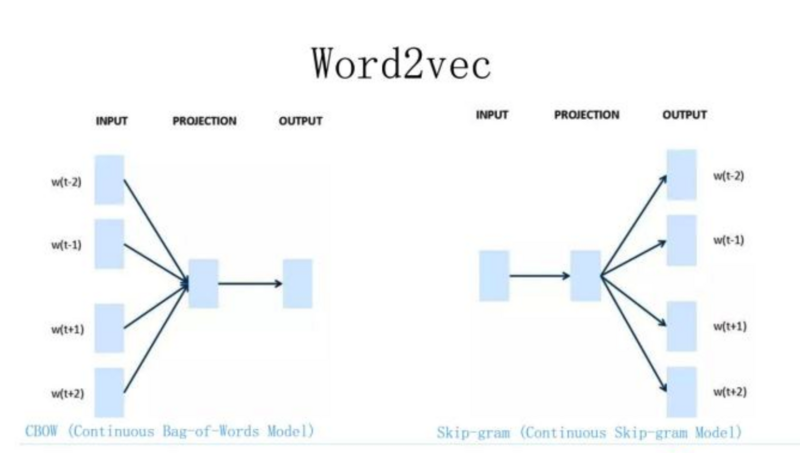

In [164]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson60-8.png')

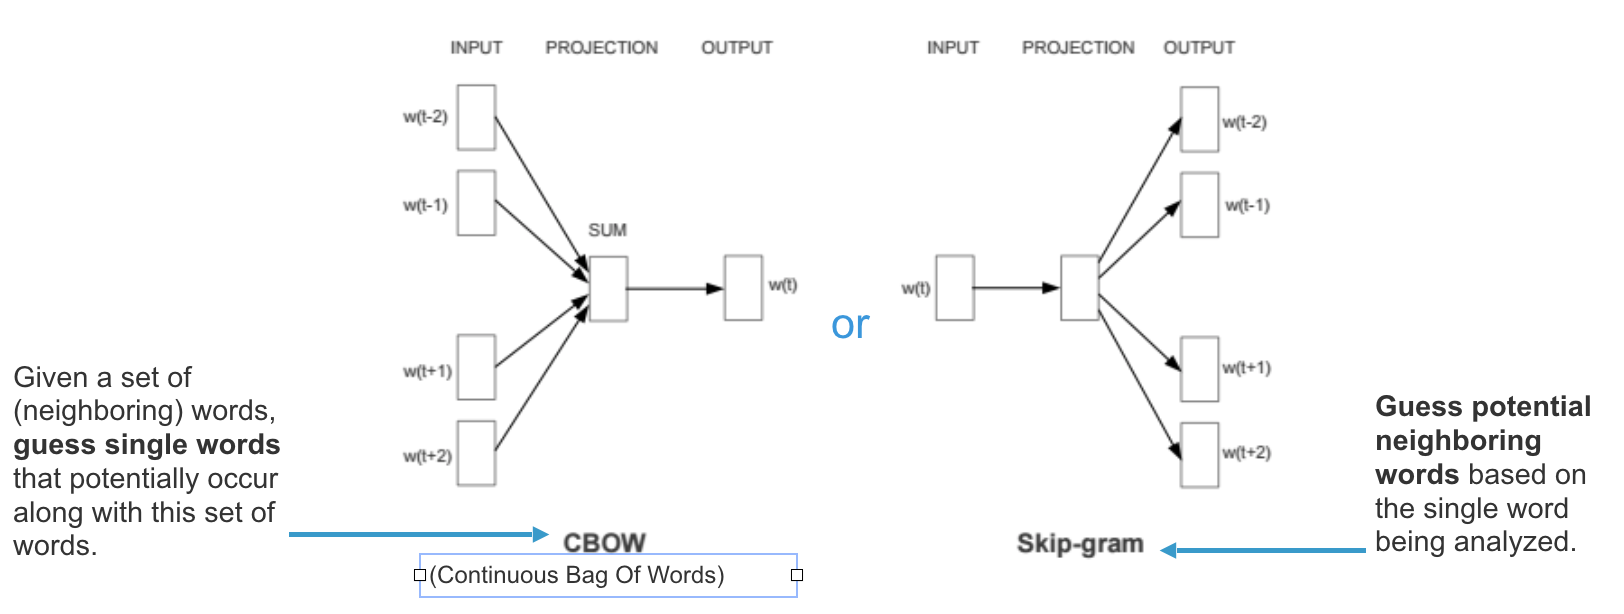

In [165]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson60-1.png')

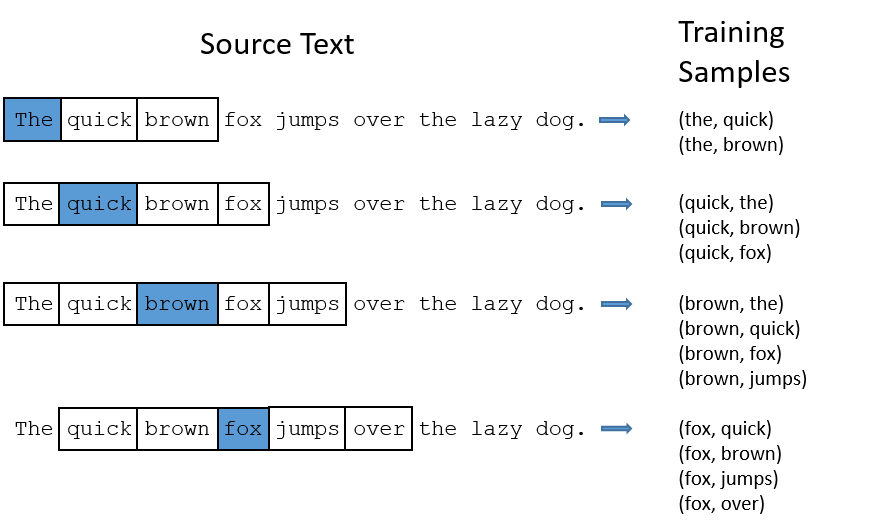

In [166]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson60-9.png')

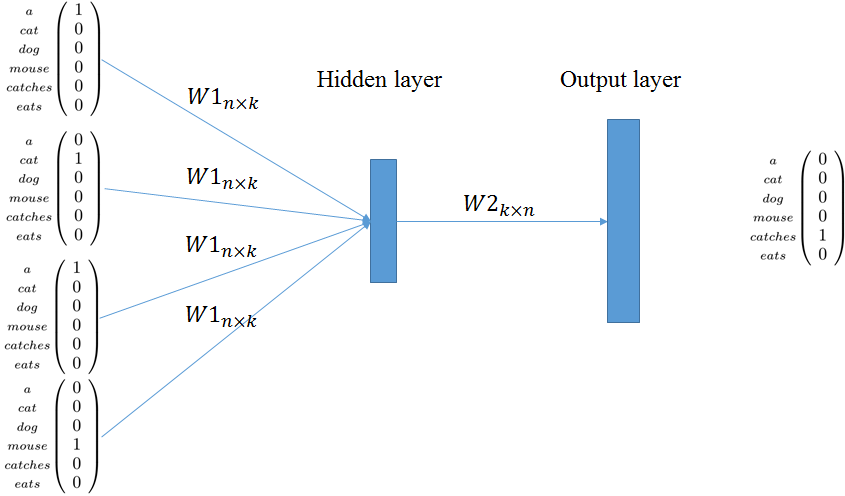

In [167]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson6-word2vec-CBOW-model.png')

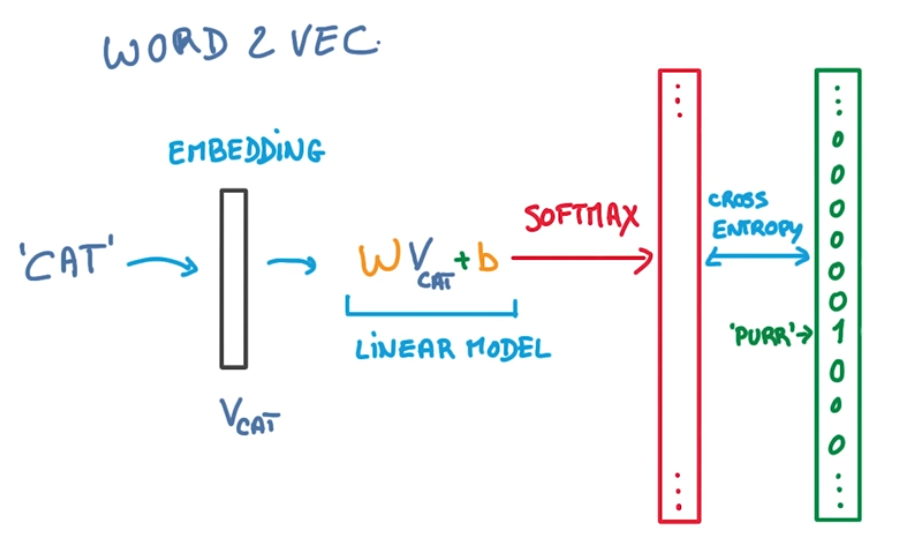

In [168]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson60-7.png')

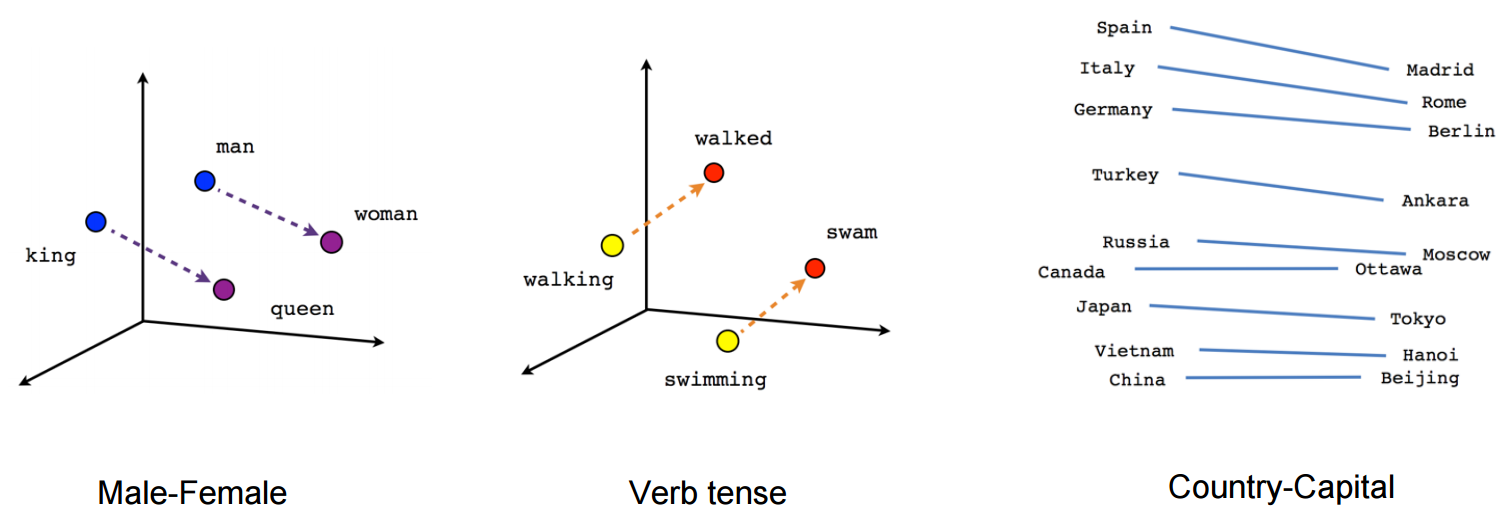

In [169]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson60-5.png')

In [205]:
import tensorflow
print(tensorflow.__version__) #conda create –n myenv python=1.15 参照第56课

1.15.0


In [206]:
#Dataset 10 sentences to create word vectors

corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [208]:
#Remove stop words

def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [209]:
corpus = remove_stop_words(corpus)

In [210]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [211]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

In [212]:
words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

#data generation - generate label for each word using skip gram

In CBOW the vectors from the context words are averaged before predicting the center word. In skip-gram there is no averaging of embedding vectors. It seems like the model can learn better representations for the rare words when their vectors are not averaged with the other context words in the process of making the predictions.

In [213]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i
    print(word2int)

{'woman': 0}
{'woman': 0, 'pretty': 1}
{'woman': 0, 'pretty': 1, 'wise': 2}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3, 'king': 4}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3, 'king': 4, 'man': 5}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3, 'king': 4, 'man': 5, 'young': 6}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3, 'king': 4, 'man': 5, 'young': 6, 'prince': 7}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3, 'king': 4, 'man': 5, 'young': 6, 'prince': 7, 'princess': 8}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3, 'king': 4, 'man': 5, 'young': 6, 'prince': 7, 'princess': 8, 'girl': 9}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3, 'king': 4, 'man': 5, 'young': 6, 'prince': 7, 'princess': 8, 'girl': 9, 'strong': 10}
{'woman': 0, 'pretty': 1, 'wise': 2, 'queen': 3, 'king': 4, 'man': 5, 'young': 6, 'prince': 7, 'princess': 8, 'girl': 9, 'strong': 10, 'boy': 11}


In [214]:
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    print(sentences)

[['king', 'strong', 'man']]
[['king', 'strong', 'man'], ['queen', 'wise', 'woman']]
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man']]
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman']]
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king']]
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen']]
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong']]
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty']]
[['king', 'strong',

In [215]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])
                print(data)

[['king', 'strong']]
[['king', 'strong'], ['king', 'man']]
[['king', 'strong'], ['king', 'man'], ['strong', 'king']]
[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man']]
[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king']]
[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong']]
[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise']]
[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise'], ['queen', 'woman']]
[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise'], ['queen', 'woman'], ['wise', 'queen']]
[['king', 'strong'], ['king', 'man'], ['strong', 'king'], ['strong', 'man'], ['man', 'king'], ['man', 'strong'], ['queen', 'wise'], ['queen', 'w

In [180]:
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [181]:
sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [228]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])
df

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [229]:
df.shape

(52, 2)

In [230]:
word2int

{'woman': 0,
 'pretty': 1,
 'wise': 2,
 'queen': 3,
 'king': 4,
 'man': 5,
 'young': 6,
 'prince': 7,
 'princess': 8,
 'girl': 9,
 'strong': 10,
 'boy': 11}

In [231]:
#Define Tensorflow Graph
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)
ONE_HOT_DIM

12

In [237]:
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))
    
Y

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0.

In [238]:
# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

X_train

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.,

In [239]:
# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [240]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  3.1304233
iteration 3000 loss is :  1.7581303
iteration 6000 loss is :  1.7084817
iteration 9000 loss is :  1.6888046
iteration 12000 loss is :  1.6773547
iteration 15000 loss is :  1.6695735
iteration 18000 loss is :  1.6637708


In [241]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[ 0.10332811 -1.3386636 ]
 [ 2.6608357  -0.8343611 ]
 [ 2.2271624  -4.9419622 ]
 [ 0.35102606 -0.69297254]
 [-1.1935496   0.0120942 ]
 [-4.4917374  -0.27709442]
 [ 0.14195776  0.23346353]
 [-6.4730964  -0.12667865]
 [ 1.1410313  -5.0001373 ]
 [ 0.67039824 -1.5605712 ]
 [-2.2287621   2.760795  ]
 [-1.2145482   0.14787745]]


In [242]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,woman,0.103328,-1.338664
1,pretty,2.660836,-0.834361
2,wise,2.227162,-4.941962
3,queen,0.351026,-0.692973
4,king,-1.193550,0.012094
5,man,-4.491737,-0.277094
6,young,0.141958,0.233464
7,prince,-6.473096,-0.126679
8,princess,1.141031,-5.000137
9,girl,0.670398,-1.560571


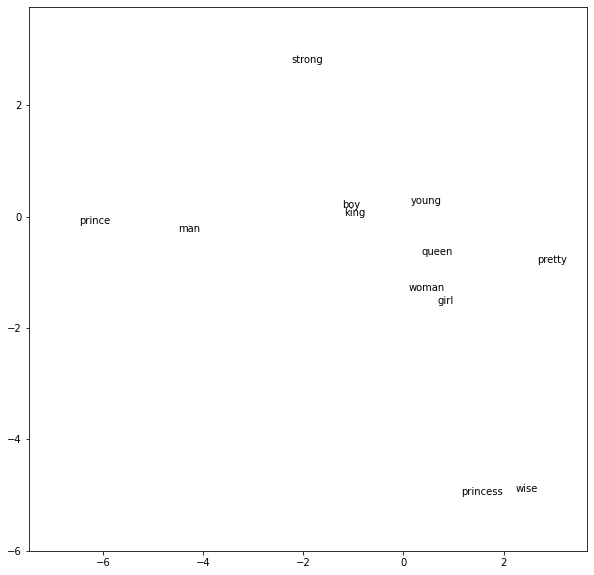

In [243]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

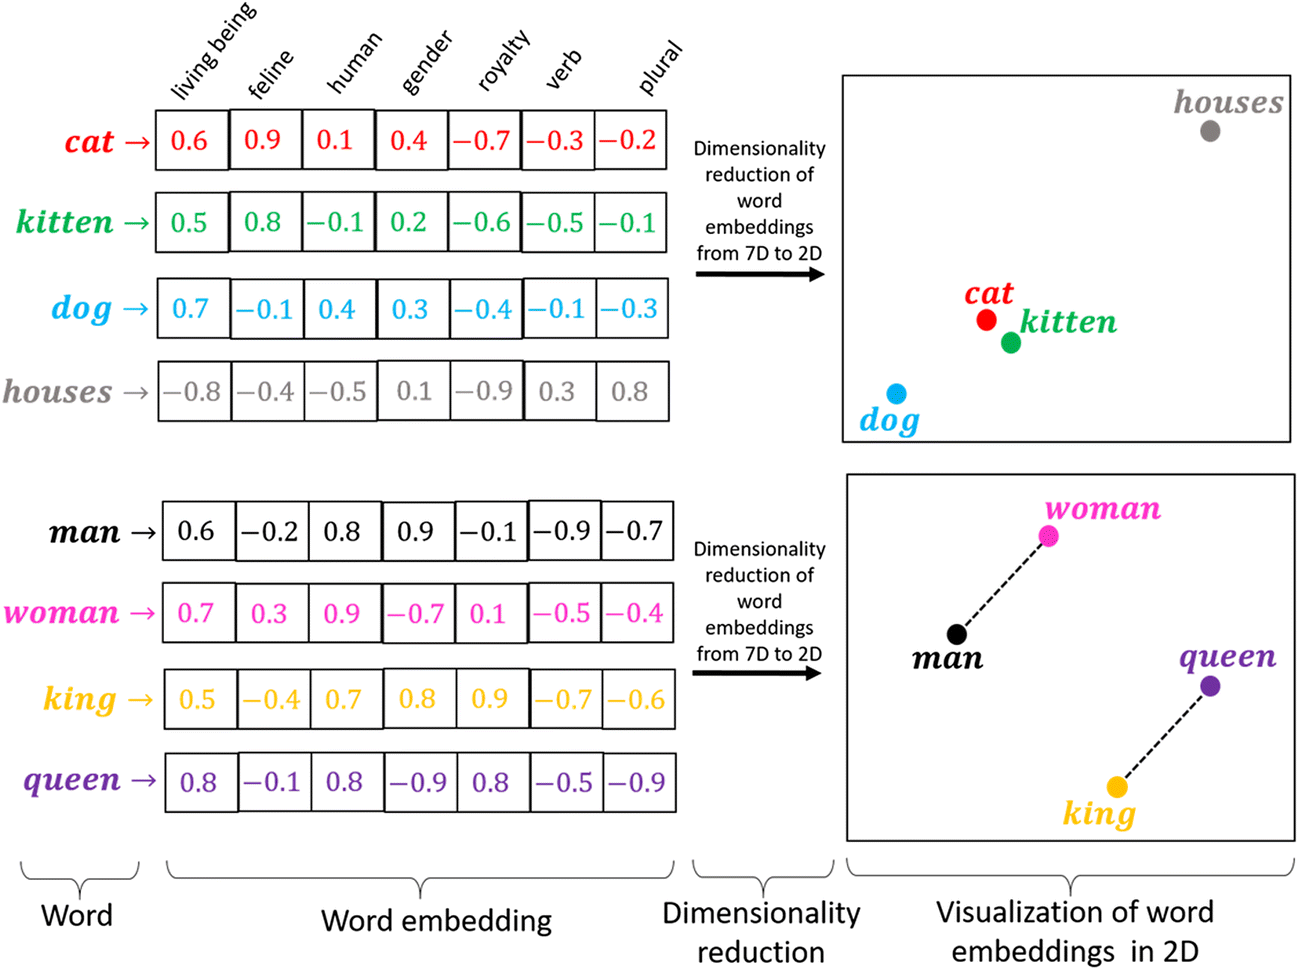

In [193]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson58-10.png')

In [244]:
# Deep learning: 
from keras.models import Input, Model
from keras.layers import Dense

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
#inp = Input(shape=(X.shape[1],))
#x = Dense(units=embed_size, activation='linear')(inp)
#x = Dense(units=Y.shape[1], activation='softmax')(x)
xx = Input(shape=(X_train.shape[1],))
yy = Dense(units=embed_size, activation='linear')(xx)
yy = Dense(units=Y_train.shape[1], activation='softmax')(yy)
model = Model(inputs=xx, outputs=yy)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X_train, 
    y=Y_train, 
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[df.get(word)]
        })

Epoch 1/1000
52/52 [==============================] - 0s 5ms/step - loss: 2.5145
Epoch 2/1000
52/52 [==============================] - 0s 58us/step - loss: 2.5138
Epoch 3/1000
52/52 [==============================] - 0s 77us/step - loss: 2.5131
Epoch 4/1000
52/52 [==============================] - 0s 38us/step - loss: 2.5123
Epoch 5/1000
52/52 [==============================] - 0s 77us/step - loss: 2.5115
Epoch 6/1000
52/52 [==============================] - 0s 38us/step - loss: 2.5107
Epoch 7/1000
52/52 [==============================] - 0s 58us/step - loss: 2.5099
Epoch 8/1000
52/52 [==============================] - 0s 77us/step - loss: 2.5090
Epoch 9/1000
52/52 [==============================] - 0s 58us/step - loss: 2.5082
Epoch 10/1000
52/52 [==============================] - 0s 115us/step - loss: 2.5074
Epoch 11/1000
52/52 [==============================] - 0s 38us/step - loss: 2.5065
Epoch 12/1000
52/52 [==============================] - 0s 38us/step - loss: 2.5057
Epoch 13/1000

Epoch 100/1000
52/52 [==============================] - 0s 38us/step - loss: 2.4435
Epoch 101/1000
52/52 [==============================] - 0s 77us/step - loss: 2.4429
Epoch 102/1000
52/52 [==============================] - 0s 58us/step - loss: 2.4423
Epoch 103/1000
52/52 [==============================] - 0s 77us/step - loss: 2.4417
Epoch 104/1000
52/52 [==============================] - 0s 77us/step - loss: 2.4411
Epoch 105/1000
52/52 [==============================] - 0s 77us/step - loss: 2.4404
Epoch 106/1000
52/52 [==============================] - 0s 58us/step - loss: 2.4398
Epoch 107/1000
52/52 [==============================] - 0s 96us/step - loss: 2.4392
Epoch 108/1000
52/52 [==============================] - 0s 38us/step - loss: 2.4386
Epoch 109/1000
52/52 [==============================] - 0s 58us/step - loss: 2.4380
Epoch 110/1000
52/52 [==============================] - 0s 58us/step - loss: 2.4374
Epoch 111/1000
52/52 [==============================] - 0s 58us/step - loss:

Epoch 198/1000
52/52 [==============================] - 0s 77us/step - loss: 2.3852
Epoch 199/1000
52/52 [==============================] - 0s 77us/step - loss: 2.3846
Epoch 200/1000
52/52 [==============================] - 0s 38us/step - loss: 2.3840
Epoch 201/1000
52/52 [==============================] - 0s 77us/step - loss: 2.3834
Epoch 202/1000
52/52 [==============================] - 0s 38us/step - loss: 2.3828
Epoch 203/1000
52/52 [==============================] - 0s 19us/step - loss: 2.3823
Epoch 204/1000
52/52 [==============================] - 0s 38us/step - loss: 2.3817
Epoch 205/1000
52/52 [==============================] - 0s 38us/step - loss: 2.3811
Epoch 206/1000
52/52 [==============================] - 0s 58us/step - loss: 2.3805
Epoch 207/1000
52/52 [==============================] - 0s 58us/step - loss: 2.3799
Epoch 208/1000
52/52 [==============================] - 0s 38us/step - loss: 2.3793
Epoch 209/1000
52/52 [==============================] - 0s 77us/step - loss:

Epoch 296/1000
52/52 [==============================] - 0s 77us/step - loss: 2.3220
Epoch 297/1000
52/52 [==============================] - 0s 38us/step - loss: 2.3213
Epoch 298/1000
52/52 [==============================] - 0s 19us/step - loss: 2.3206
Epoch 299/1000
52/52 [==============================] - 0s 96us/step - loss: 2.3199
Epoch 300/1000
52/52 [==============================] - 0s 58us/step - loss: 2.3192
Epoch 301/1000
52/52 [==============================] - 0s 58us/step - loss: 2.3185
Epoch 302/1000
52/52 [==============================] - 0s 115us/step - loss: 2.3177
Epoch 303/1000
52/52 [==============================] - 0s 58us/step - loss: 2.3170
Epoch 304/1000
52/52 [==============================] - 0s 77us/step - loss: 2.3163
Epoch 305/1000
52/52 [==============================] - 0s 38us/step - loss: 2.3156
Epoch 306/1000
52/52 [==============================] - 0s 19us/step - loss: 2.3148
Epoch 307/1000
52/52 [==============================] - 0s 38us/step - loss

Epoch 394/1000
52/52 [==============================] - 0s 77us/step - loss: 2.2449
Epoch 395/1000
52/52 [==============================] - 0s 38us/step - loss: 2.2440
Epoch 396/1000
52/52 [==============================] - 0s 38us/step - loss: 2.2432
Epoch 397/1000
52/52 [==============================] - 0s 77us/step - loss: 2.2423
Epoch 398/1000
52/52 [==============================] - 0s 38us/step - loss: 2.2414
Epoch 399/1000
52/52 [==============================] - 0s 58us/step - loss: 2.2406
Epoch 400/1000
52/52 [==============================] - 0s 38us/step - loss: 2.2397
Epoch 401/1000
52/52 [==============================] - 0s 19us/step - loss: 2.2388
Epoch 402/1000
52/52 [==============================] - 0s 38us/step - loss: 2.2380
Epoch 403/1000
52/52 [==============================] - 0s 58us/step - loss: 2.2371
Epoch 404/1000
52/52 [==============================] - 0s 58us/step - loss: 2.2362
Epoch 405/1000
52/52 [==============================] - 0s 58us/step - loss:

Epoch 492/1000
52/52 [==============================] - 0s 58us/step - loss: 2.1571
Epoch 493/1000
52/52 [==============================] - 0s 77us/step - loss: 2.1562
Epoch 494/1000
52/52 [==============================] - 0s 96us/step - loss: 2.1553
Epoch 495/1000
52/52 [==============================] - 0s 38us/step - loss: 2.1544
Epoch 496/1000
52/52 [==============================] - 0s 58us/step - loss: 2.1535
Epoch 497/1000
52/52 [==============================] - 0s 77us/step - loss: 2.1526
Epoch 498/1000
52/52 [==============================] - 0s 19us/step - loss: 2.1517
Epoch 499/1000
52/52 [==============================] - 0s 38us/step - loss: 2.1508
Epoch 500/1000
52/52 [==============================] - 0s 38us/step - loss: 2.1499
Epoch 501/1000
52/52 [==============================] - 0s 154us/step - loss: 2.1490
Epoch 502/1000
52/52 [==============================] - 0s 58us/step - loss: 2.1481
Epoch 503/1000
52/52 [==============================] - 0s 38us/step - loss

Epoch 590/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0735
Epoch 591/1000
52/52 [==============================] - 0s 58us/step - loss: 2.0728
Epoch 592/1000
52/52 [==============================] - 0s 58us/step - loss: 2.0720
Epoch 593/1000
52/52 [==============================] - 0s 77us/step - loss: 2.0712
Epoch 594/1000
52/52 [==============================] - 0s 58us/step - loss: 2.0704
Epoch 595/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0697
Epoch 596/1000
52/52 [==============================] - 0s 58us/step - loss: 2.0689
Epoch 597/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0681
Epoch 598/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0674
Epoch 599/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0666
Epoch 600/1000
52/52 [==============================] - 0s 58us/step - loss: 2.0659
Epoch 601/1000
52/52 [==============================] - 0s 38us/step - loss:

Epoch 688/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0067
Epoch 689/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0061
Epoch 690/1000
52/52 [==============================] - 0s 58us/step - loss: 2.0055
Epoch 691/1000
52/52 [==============================] - 0s 58us/step - loss: 2.0049
Epoch 692/1000
52/52 [==============================] - 0s 115us/step - loss: 2.0043
Epoch 693/1000
52/52 [==============================] - 0s 77us/step - loss: 2.0038
Epoch 694/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0032
Epoch 695/1000
52/52 [==============================] - 0s 38us/step - loss: 2.0026
Epoch 696/1000
52/52 [==============================] - 0s 96us/step - loss: 2.0020
Epoch 697/1000
52/52 [==============================] - 0s 58us/step - loss: 2.0015
Epoch 698/1000
52/52 [==============================] - 0s 77us/step - loss: 2.0009
Epoch 699/1000
52/52 [==============================] - 0s 116us/step - los

Epoch 786/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9577
Epoch 787/1000
52/52 [==============================] - 0s 58us/step - loss: 1.9573
Epoch 788/1000
52/52 [==============================] - 0s 96us/step - loss: 1.9569
Epoch 789/1000
52/52 [==============================] - 0s 58us/step - loss: 1.9565
Epoch 790/1000
52/52 [==============================] - 0s 58us/step - loss: 1.9560
Epoch 791/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9556
Epoch 792/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9552
Epoch 793/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9548
Epoch 794/1000
52/52 [==============================] - 0s 77us/step - loss: 1.9544
Epoch 795/1000
52/52 [==============================] - 0s 77us/step - loss: 1.9540
Epoch 796/1000
52/52 [==============================] - 0s 58us/step - loss: 1.9536
Epoch 797/1000
52/52 [==============================] - 0s 96us/step - loss:

Epoch 884/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9222
Epoch 885/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9219
Epoch 886/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9216
Epoch 887/1000
52/52 [==============================] - 0s 58us/step - loss: 1.9213
Epoch 888/1000
52/52 [==============================] - 0s 58us/step - loss: 1.9210
Epoch 889/1000
52/52 [==============================] - 0s 154us/step - loss: 1.9207
Epoch 890/1000
52/52 [==============================] - 0s 77us/step - loss: 1.9204
Epoch 891/1000
52/52 [==============================] - 0s 77us/step - loss: 1.9201
Epoch 892/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9198
Epoch 893/1000
52/52 [==============================] - 0s 38us/step - loss: 1.9195
Epoch 894/1000
52/52 [==============================] - 0s 77us/step - loss: 1.9192
Epoch 895/1000
52/52 [==============================] - 0s 38us/step - loss

Epoch 982/1000
52/52 [==============================] - 0s 38us/step - loss: 1.8951
Epoch 983/1000
52/52 [==============================] - 0s 38us/step - loss: 1.8949
Epoch 984/1000
52/52 [==============================] - 0s 58us/step - loss: 1.8946
Epoch 985/1000
52/52 [==============================] - 0s 58us/step - loss: 1.8944
Epoch 986/1000
52/52 [==============================] - 0s 58us/step - loss: 1.8941
Epoch 987/1000
52/52 [==============================] - 0s 38us/step - loss: 1.8939
Epoch 988/1000
52/52 [==============================] - 0s 96us/step - loss: 1.8936
Epoch 989/1000
52/52 [==============================] - 0s 58us/step - loss: 1.8934
Epoch 990/1000
52/52 [==============================] - 0s 58us/step - loss: 1.8931
Epoch 991/1000
52/52 [==============================] - 0s 58us/step - loss: 1.8929
Epoch 992/1000
52/52 [==============================] - 0s 58us/step - loss: 1.8927
Epoch 993/1000
52/52 [==============================] - 0s 38us/step - loss:

In [245]:
X_train.shape[1]

12

In [246]:
embedding_dict

{'woman': array([[[ 0.2337454 ,  1.2973535 ],
         [-0.87127537,  1.7172883 ],
         [-0.72840196,  1.5913141 ],
         [ 0.5539842 ,  1.4245622 ],
         [-0.79747355, -0.9538985 ],
         [-0.06493112, -0.49514878],
         [-0.25072268,  0.26793438],
         [ 1.0274981 , -1.0147532 ],
         [ 0.73913145,  0.9776237 ],
         [ 0.20302789,  0.7951871 ],
         [-1.1559563 , -0.65081906],
         [-0.66219187, -1.2044178 ]]], dtype=float32),
 'pretty': array([[[ 0.2337454 ,  1.2973535 ],
         [-0.87127537,  1.7172883 ],
         [-0.72840196,  1.5913141 ],
         [ 0.5539842 ,  1.4245622 ],
         [-0.79747355, -0.9538985 ],
         [-0.06493112, -0.49514878],
         [-0.25072268,  0.26793438],
         [ 1.0274981 , -1.0147532 ],
         [ 0.73913145,  0.9776237 ],
         [ 0.20302789,  0.7951871 ],
         [-1.1559563 , -0.65081906],
         [-0.66219187, -1.2044178 ]]], dtype=float32),
 'wise': array([[[ 0.2337454 ,  1.2973535 ],
         [-0

In [247]:
weights

array([[ 0.2337454 ,  1.2973535 ],
       [-0.87127537,  1.7172883 ],
       [-0.72840196,  1.5913141 ],
       [ 0.5539842 ,  1.4245622 ],
       [-0.79747355, -0.9538985 ],
       [-0.06493112, -0.49514878],
       [-0.25072268,  0.26793438],
       [ 1.0274981 , -1.0147532 ],
       [ 0.73913145,  0.9776237 ],
       [ 0.20302789,  0.7951871 ],
       [-1.1559563 , -0.65081906],
       [-0.66219187, -1.2044178 ]], dtype=float32)

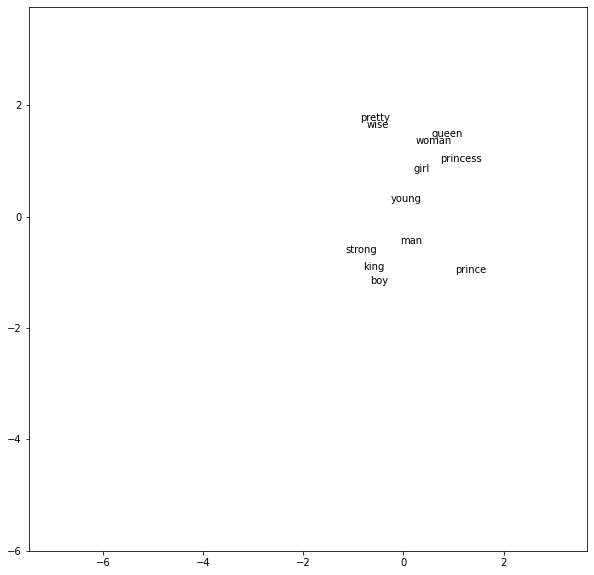

In [248]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
for word, x1, x2 in zip(w2v_df['word'], weights[:,0], weights[:,1]):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [251]:
X_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [252]:
model.predict(X_train)[0]

array([0.02189669, 0.00654478, 0.00559873, 0.0176888 , 0.18557574,
       0.24661769, 0.09437415, 0.20838091, 0.00497203, 0.0038471 ,
       0.10445394, 0.10004942], dtype=float32)